#3 1)Prepare the environment

In [4]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

#3 2)Pandas read a local csv

In [5]:
df = pd.read_csv("~/Desktop/student_grades.csv")

#3 3)Pandas:Sample and summarize

In [6]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [7]:
df.shape

(104, 5)

In [8]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,78.461538,77.307692,84.153846,81.692308
std,30.166206,14.284844,10.295703,8.714199,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [9]:
df1=df.describe()
IQR=df1.loc['75%',['exam1','exam2','exam3']]-df1.loc['25%',['exam1','exam2','exam3']]
Range=df1.loc['max',['exam1','exam2','exam3']]-df1.loc['min',['exam1','exam2','exam3']]
print(IQR)
print(Range)

exam1    22.0
exam2    19.0
exam3    16.0
dtype: float64
exam1    43.0
exam2    28.0
exam3    26.0
dtype: float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          104 non-null int64
exam2          104 non-null int64
exam3          104 non-null int64
final_grade    104 non-null int64
dtypes: int64(5)
memory usage: 4.1 KB


#3 4)Ensure no null values

In [11]:
print(df.isnull().sum())

# or
# print(df.columns[df.isnull().any()])

student_id     0
exam1          0
exam2          0
exam3          0
final_grade    0
dtype: int64


In [12]:
# we will create a melted version of train for visualization purposes
df_melted = pd.melt(df, id_vars=['student_id'], value_vars=['exam1','exam2','exam3','final_grade'], 
                    var_name='grade_type', value_name='score')

In [13]:
df_melted.head()

,student_id,grade_type,score
0,1,exam1,100
1,2,exam1,98
2,3,exam1,85
3,4,exam1,83
4,5,exam1,93


In [14]:
df_melted['grade_type'].value_counts()

exam1          104
exam2          104
exam3          104
final_grade    104
Name: grade_type, dtype: int64

In [15]:
df_melted['score'].value_counts(bins=10,sort=False)

(56.956, 61.3]    16
(61.3, 65.6]      40
(65.6, 69.9]       8
(69.9, 74.2]      72
(74.2, 78.5]      56
(78.5, 82.8]      32
(82.8, 87.1]      64
(87.1, 91.4]      24
(91.4, 95.7]      56
(95.7, 100.0]     48
Name: score, dtype: int64

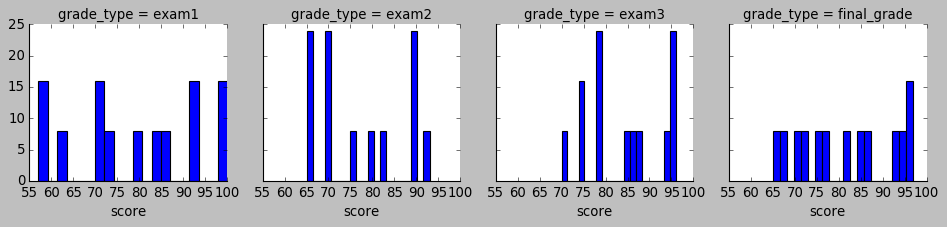

In [16]:
# Histogram
grid = sns.FacetGrid(df_melted, col="grade_type", margin_titles=True)
grid.map(plt.hist, "score", bins=20);

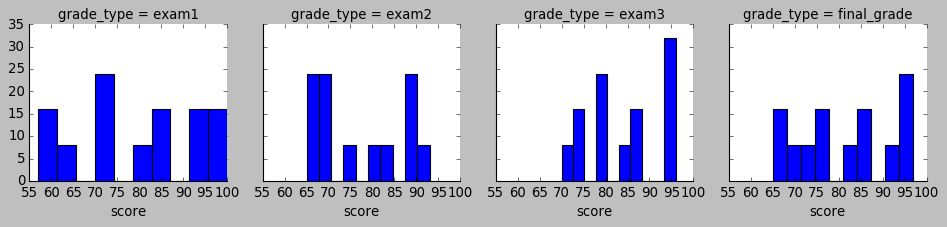

In [17]:
grid = sns.FacetGrid(df_melted, col="grade_type", margin_titles=True)
grid.map(plt.hist, "score", bins=10);

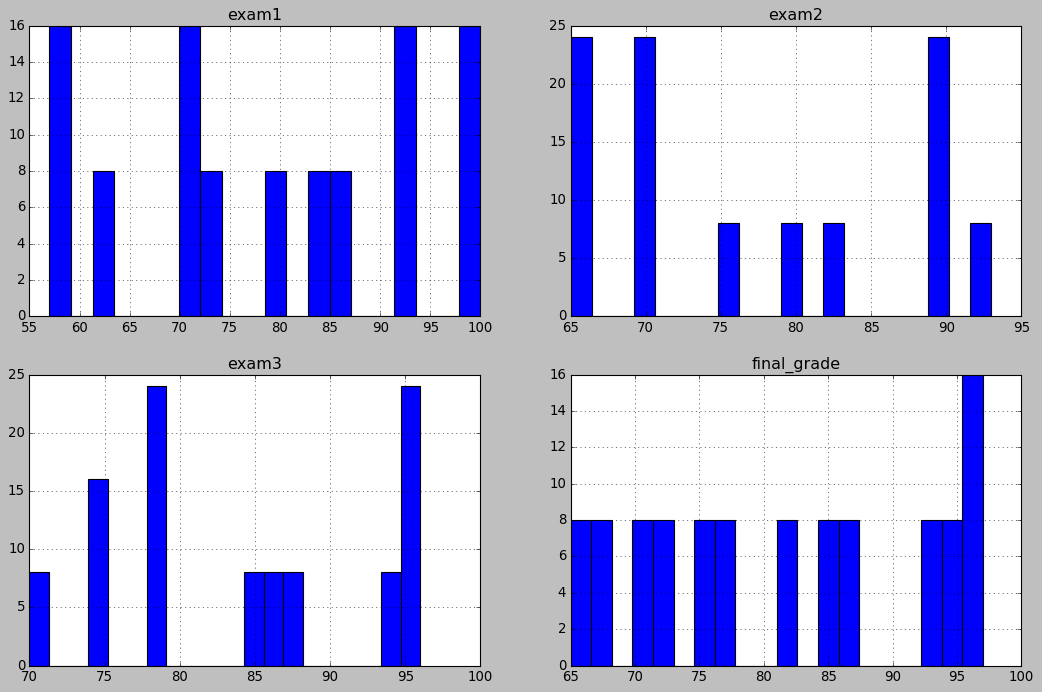

In [18]:
#using Matplotlib with subplots
plt.figure(figsize=(16, 10))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)

#3 Deconstruct the above code line by line

In [19]:
for_list = list(enumerate(['exam1', 'exam2', 'exam3', 'final_grade']))
print(for_list)
ex1_ix_col_tuple = for_list[0]
print(ex1_ix_col_tuple) 
ex1_index = ex1_ix_col_tuple[0]
print(ex1_index)

[(0, 'exam1'), (1, 'exam2'), (2, 'exam3'), (3, 'final_grade')]
(0, 'exam1')
0


In [20]:
i = ex1_ix_col_tuple[0]
print("The first item of the tuple is the index.  The first index = %.0f" % i)
col = ex1_ix_col_tuple[1]
print("The second item of the tuple is the column name.  The first column name = %s" % col)

The first item of the tuple is the index.  The first index = 0
The second item of the tuple is the column name.  The first column name = exam1


In [21]:
plot_number = i + 1 # i starts at 0, but plot nos should start at 1
print("plot_number: %.0f" % plot_number)
series = df[col]
print("Number of grades in the series: %.0f" % series.shape[0])
print(series.head())

plot_number: 1
Number of grades in the series: 104
0    100
1     98
2     85
3     83
4     93
Name: exam1, dtype: int64


In [1]:
plt.subplot(2, 2, plot_number) # plot number = 1

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'exam1')

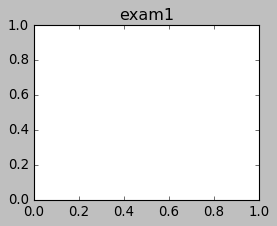

In [23]:
plt.subplot(2, 2, plot_number) # plot number = 1
plt.title(col) # plot title = 'exam1'

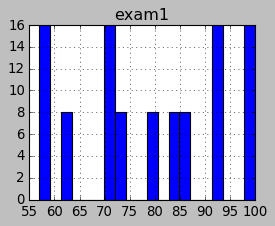

In [24]:
plt.subplot(2, 2, plot_number) # plot number = 1
plt.title(col) # plot title = 'exam1'
series.hist(bins=20, density=False, cumulative=False, log=False) # plot the histogram

#3 Make a box plot.

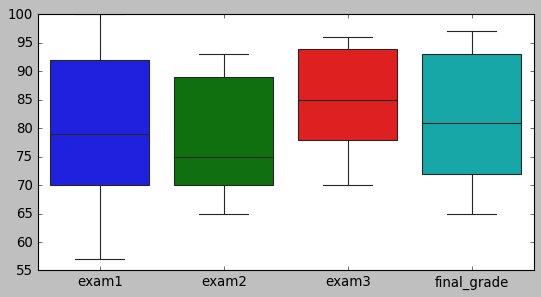

In [25]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))

In [26]:
#Sklearn:split into test/train

In [27]:
# test_train_split
X = df.drop(['final_grade','student_id'], axis=1)
#pass it a list
print(X.head())

y = df[['final_grade']]
print(y.head())

   exam1  exam2  exam3
0    100     90     95
1     98     93     96
2     85     83     87
3     83     80     86
4     93     90     96
   final_grade
0           96
1           95
2           87
3           85
4           97


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

In [29]:
train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['exam1', 'exam2', 'exam3', 'final_grade']
Train dimensions (rows, columns): (83, 4)


In [30]:
test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['exam1', 'exam2', 'exam3', 'final_grade']
Test dimensions (rows, columns): (21, 4)


In [31]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


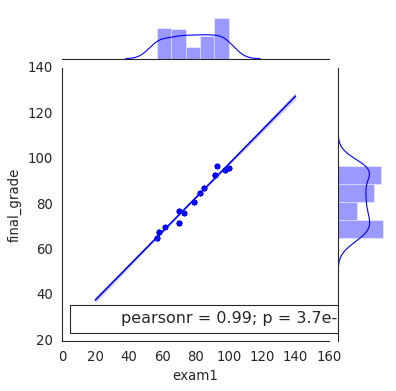

In [32]:
with sns.axes_style('white'):
    j = sns.jointplot("exam1", "final_grade", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

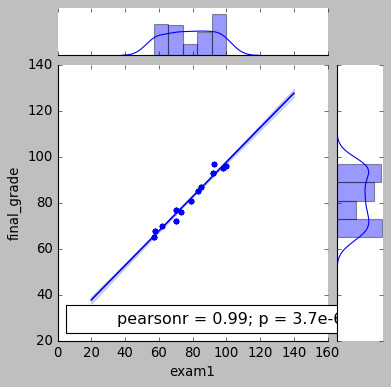

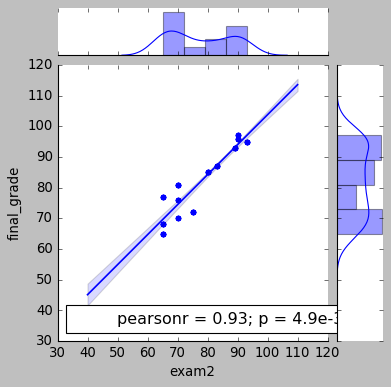

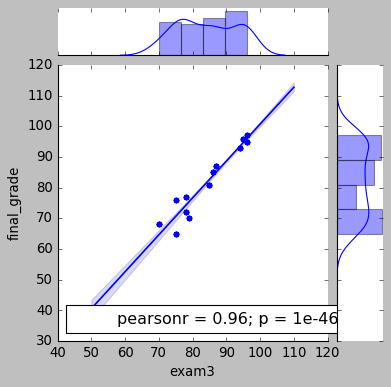

In [33]:
#plt.figure(figsize=(16, 10))
#with sns.axes_style('white'):

for i, col in enumerate(['exam1', 'exam2', 'exam3']):
    j = sns.jointplot(col, "final_grade", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
    plt.show()

In [34]:
#Each graph has an r value close to 1 which shows correlation to target variable.

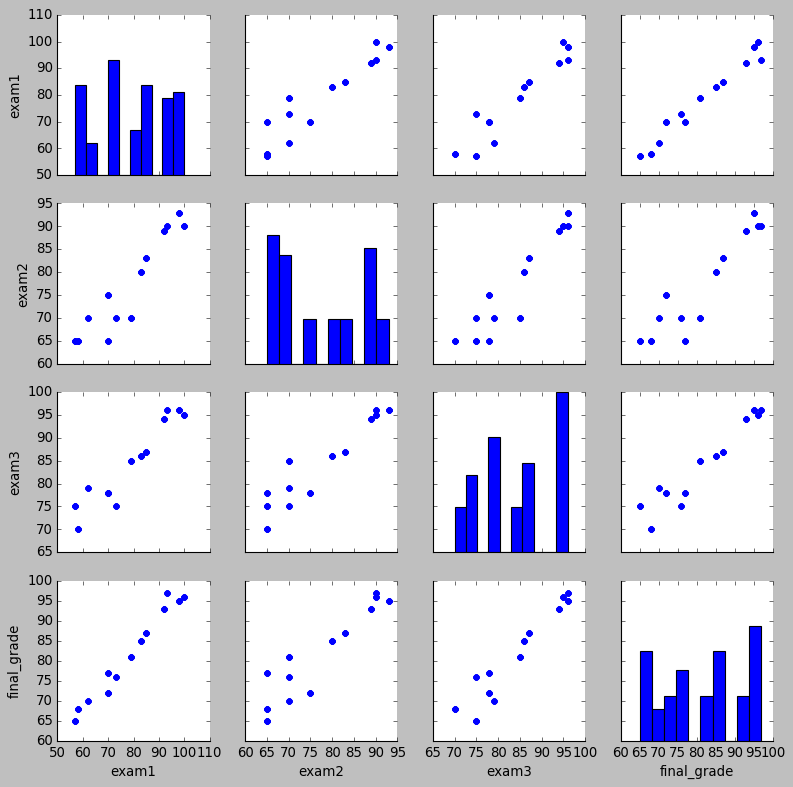

In [35]:
# This is roughly equivalent to sns.jointplot, but we see here that we have the
# flexibility to customize the type of the plots in each position.

g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

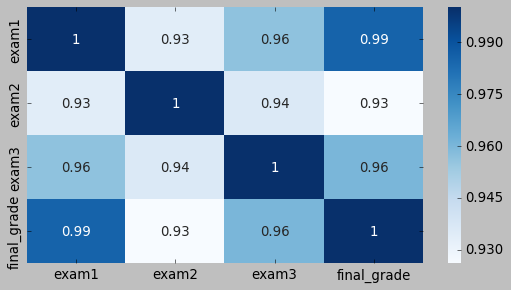

In [36]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

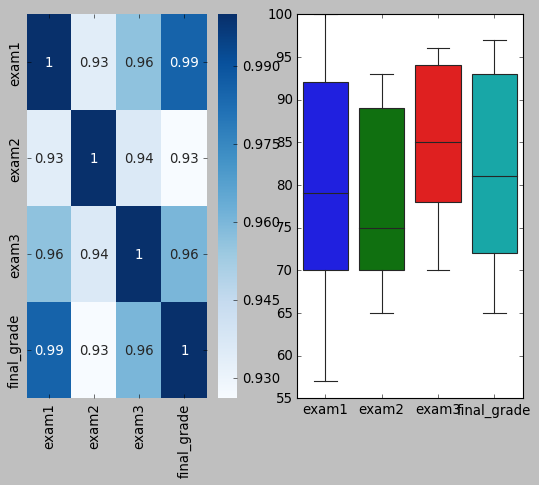

In [37]:
plt.subplot(1, 2, 1)
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.drop(columns=['student_id']))
plt.show()

In [38]:
pearsonr(X_train[['exam1']], y_train)

(array([0.98548827]), array([3.67959731e-64]))

In [39]:
#Is column a keyword??
[[column, pearsonr(train[column], train.final_grade)] for column in X_train] 

[['exam1', (0.9854882734738365, 3.679597306767771e-64)],
 ['exam2', (0.9260773842724218, 4.9387065956533756e-36)],
 ['exam3', (0.9604227932900589, 1.0003417783597307e-46)]]

In [40]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.final_grade) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'exam1': (0.9854882734738365, 3.679597306767771e-64),
 'exam2': (0.9260773842724218, 4.9387065956533756e-36),
 'exam3': (0.9604227932900589, 1.0003417783597307e-46)}

In [41]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.103e+04
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          3.76e-131
Time:                        09:00:47   Log-Likelihood:                -170.25
No. Observations:                  83   AIC:                             346.5
Df Residuals:                      80   BIC:                             353.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exam1          0.4555      0.036     12.625      0.000       0.384       0.527
exam2         -0.0307      0.063     -0.486      0.629      -0.157       0.095
exam3          0.5728      0.049     11.633      0.000       0.475       0.671
==============================================================================
Omnibus:                       30.491   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.671
Skew:                           0.427   Prob(JB):                       0.0216
Kurtosis:                       1.780   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Create linear regression objects
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [43]:
lm1.fit(X_train[['exam1']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[22.88211318]
[[0.74850854]]


In [44]:
print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - final_exam = b + m * exam1
    y-intercept (b): 22.88
    coefficient (m): 0.75



In [45]:
y_pred_lm1 = lm1.predict(X_train[['exam1']])

In [46]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

lm1
  mse: 3.37


In [47]:
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_lm1))

  97.12% of the variance in the students final grade can be explained by the grade on the first exam.


In [48]:
lm2 = LinearRegression()
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [49]:
lm2.fit(X_train[['exam1', 'exam3']], y_train)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [50]:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

[12.79518052]
[[0.59709165 0.26106586]]


In [51]:
print('Multivariate - final_exam = b + m1 * exam1 + m2 * exam3')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm2_coefficients[0][1])

Multivariate - final_exam = b + m1 * exam1 + m2 * exam3
    y-intercept  (b): 12.80
    coefficient (m1): 0.60
    coefficient (m2): 0.26


In [52]:
y_pred_lm2 = lm2.predict(X_train.drop(columns=['exam2']))

In [53]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2)) 

lm2
  mse: 2.94


In [54]:
# Make predictions using the testing set
y_pred_lm2 = lm2.predict(X_test[['exam1', 'exam3']])

In [55]:
mse = mean_squared_error(y_test, y_pred_lm2)

print("Mean squared error: %.2f" % mse)

Mean squared error: 3.42


In [56]:
r2 = r2_score(y_test, y_pred_lm2)

print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the first 3 exams.'
      .format(r2))

97.20% of the variance in the students final grade can be explained by the grades on the first 3 exams.


Text(0, 0.5, 'Residuals')

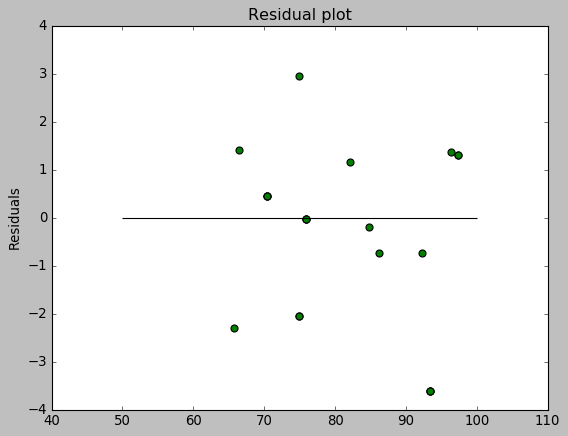

In [57]:
plt.scatter(y_pred_lm2, y_pred_lm2 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')